<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-multi-aperture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
s = cr.ShortCadence(toiid=837)

Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Searching lightcurvefile for TIC 460205581 (sector 10)
Found 1 lightcurves
Using TESS short cadence.



In [4]:
#generate custom lightcurve
lc = s.make_custom_lc()

Using lightcurve with custom aperture.

Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only


Removing scattered light + applying PLD
Querying TIC catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec


### varying apertures

Using lightcurve with custom aperture.
Removing scattered light + applying PLD
mask=pipeline; contratio=0.08
Using lightcurve with custom aperture.
Brightest star is detected far from the center.
Aperture mask is placed at the center instead.

Removing scattered light + applying PLD
mask=round; contratio=0.13
Using lightcurve with custom aperture.
Brightest star detected is far from the center.
Aperture mask is placed at the center instead.

Removing scattered light + applying PLD
mask=square; contratio=0.16
Using lightcurve with custom aperture.
Removing scattered light + applying PLD
mask=threshold; contratio=0.05


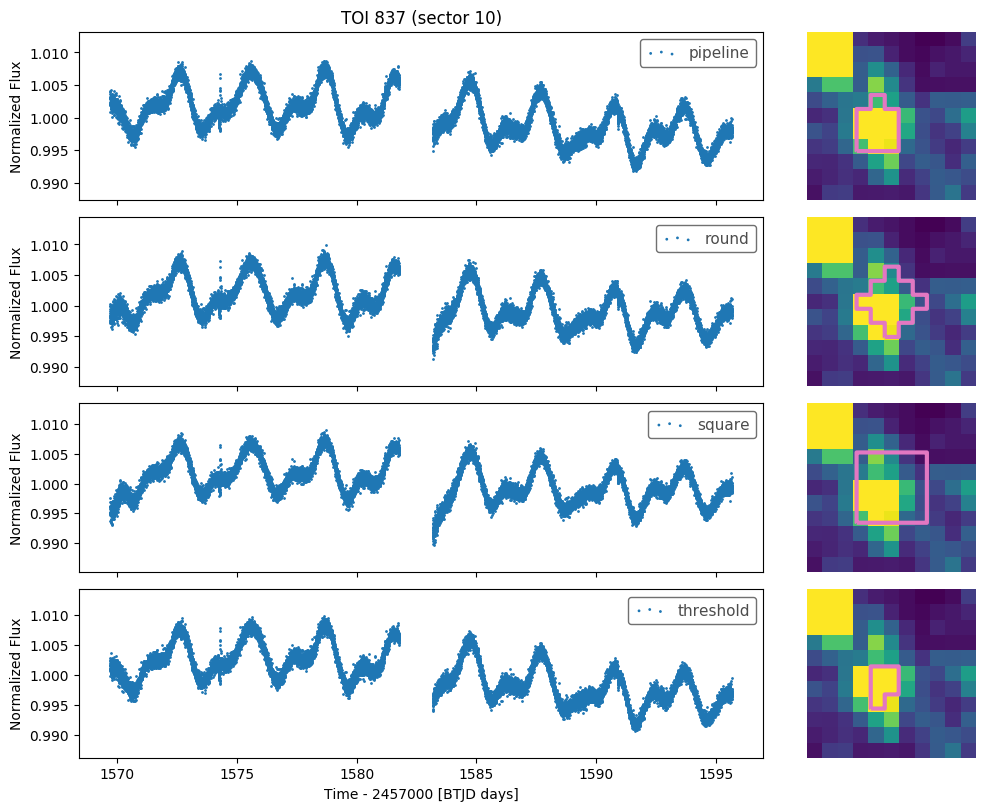

In [5]:
#custom lightcurves with varying apertures
apertures = ['pipeline','round','square','threshold']
kwargs = {'aper_radius': 2, 'threshold_sigma': 5}

fig, custom_lcs = s.plot_lc_per_aperture(apertures=apertures,
                             kwargs=kwargs, return_lcs=True
                            )

Using biweight filter with window_length=0.23 day
Using biweight filter with window_length=0.23 day
Using biweight filter with window_length=0.23 day
Using biweight filter with window_length=0.23 day


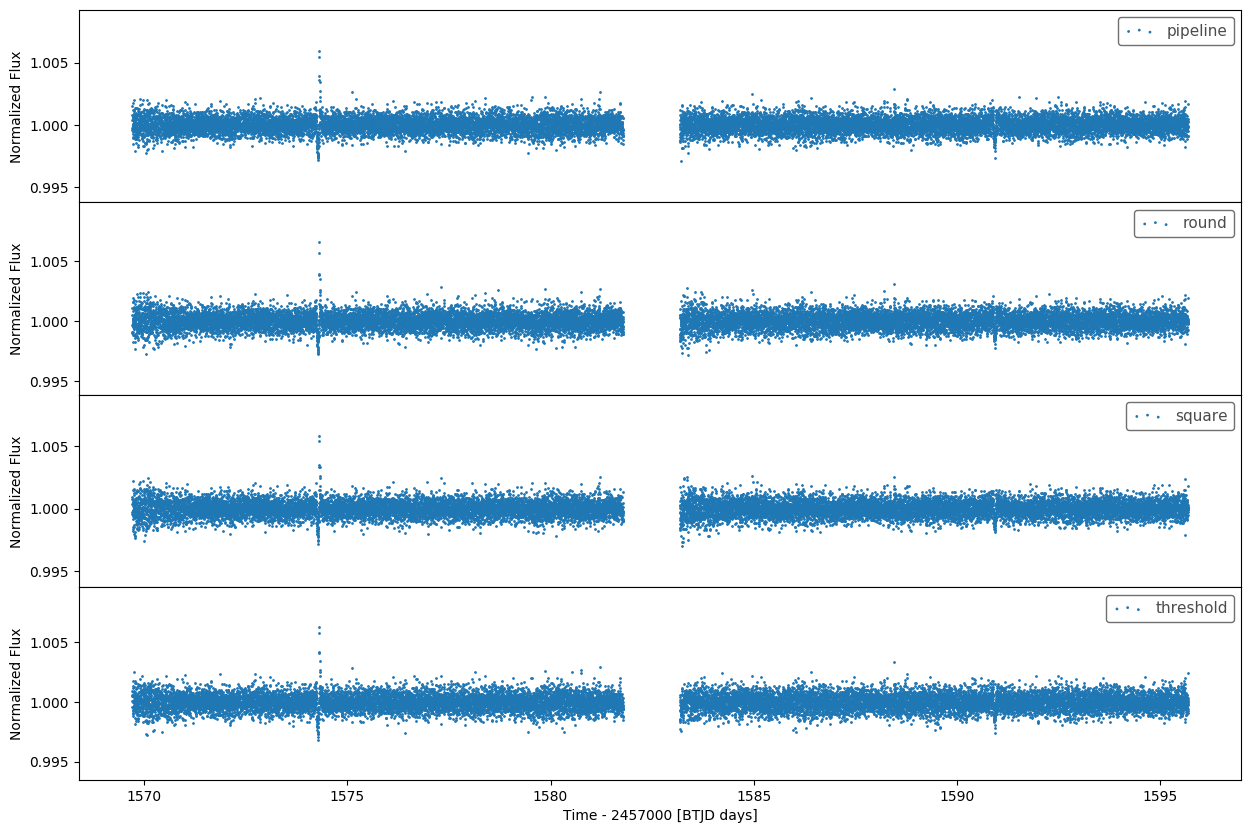

In [6]:
fig, axs = pl.subplots(len(custom_lcs), 1, figsize=(15,10), sharex=True,
                       gridspec_kw={'hspace': 0}
                      )

flats = {}
for n,mask in enumerate(custom_lcs):
    lc = custom_lcs[mask]
    flat = s.get_flat_lc(lc)
    flat.scatter(label=mask, ax=axs[n], 
                )
    flats[mask] = flat

In [7]:
period = s.toi_params['Period (days)']
t0 = s.toi_params['Epoch (BJD)']

  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17595 data points, 2348 periods from 0.601 to 12.986 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:20<00:00
  0%|          | 0/10289 [00:00<?, ?it/s]

Searching for best T0 for period 5.54797 days


100%|██████████| 10289/10289 [00:02<00:00, 3447.17it/s]
  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17595 data points, 2348 periods from 0.601 to 12.986 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:19<00:00
  2%|▏         | 204/10289 [00:00<00:04, 2039.32it/s]

Searching for best T0 for period 5.54797 days


100%|██████████| 10289/10289 [00:03<00:00, 3196.78it/s]
  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17595 data points, 2348 periods from 0.601 to 12.986 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:17<00:00
  2%|▏         | 242/10289 [00:00<00:04, 2417.92it/s]

Searching for best T0 for period 5.54797 days


100%|██████████| 10289/10289 [00:03<00:00, 3399.61it/s]
  0%|          | 0/2348 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 17595 data points, 2348 periods from 0.601 to 12.986 days
Using all 8 CPU threads


100%|██████████| 2348/2348 periods | 00:21<00:00
  2%|▏         | 237/10289 [00:00<00:04, 2364.71it/s]

Searching for best T0 for period 5.54797 days


100%|██████████| 10289/10289 [00:02<00:00, 3620.73it/s]


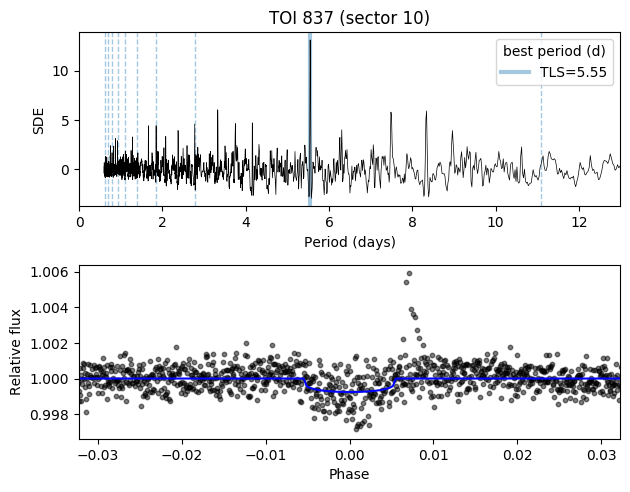

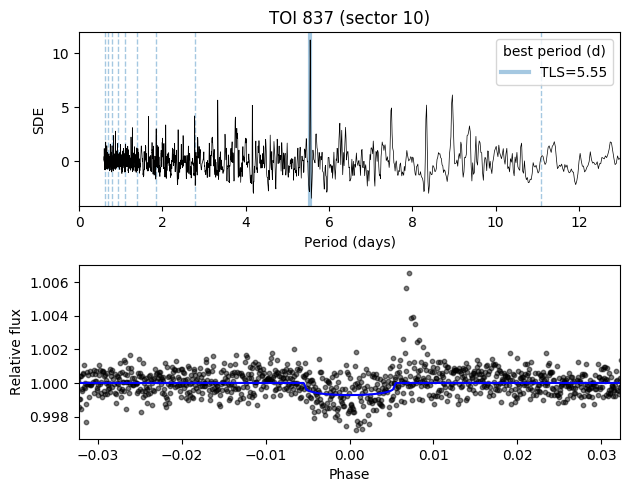

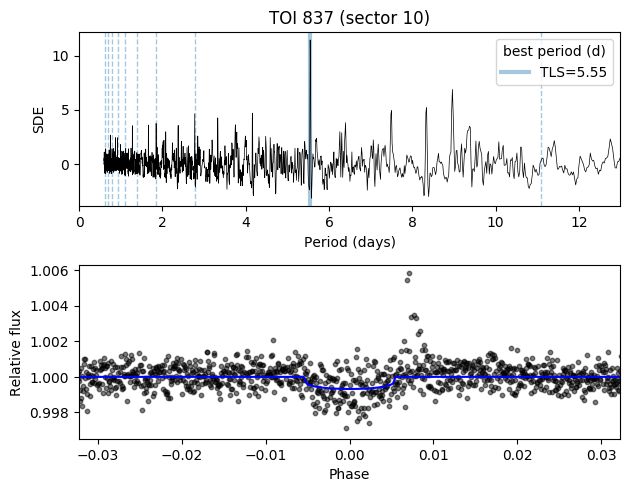

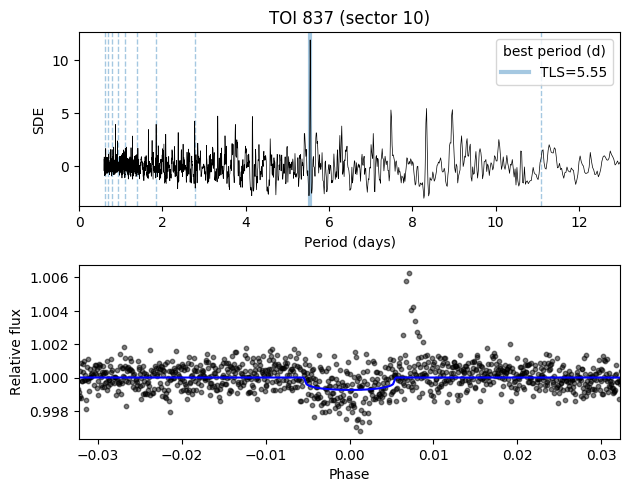

In [8]:
for mask in custom_lcs:
    flat = flats[mask]
    fig = s.run_tls(flat, plot=True)